In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

#DATA (Preparing and loading)


In [ ]:
#  PARAMETERS
weight=1.2
bias=0.4

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias
len(X), len(Y)

In [ ]:
trsplit = int(0.8 * len(X))
x_train, y_train= X[:trsplit],Y[:trsplit]
x_test, y_test=X[trsplit:],Y[trsplit:]

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data,test_labels,c='r',label='Testing data')
    if predictions is not None:
        plt.plot(test_data, predictions, c='black',label='Prediction')
    plt.legend()


In [ ]:
plot_predictions()

###Building Model

In [ ]:
class LRg(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [ ]:
model0 = LRg()
list(model0.parameters())

In [ ]:
model0.state_dict(), weight, bias

In [ ]:
with torch.inference_mode():
    y_pred = model0(x_test)

y_pred, y_test

In [ ]:
plot_predictions(predictions=y_pred)

Training Model

In [ ]:
list(model0.parameters()), model0.state_dict()

In [ ]:
loss_fn=nn.L1Loss()  #LOSS FUNCTION

optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)  #OPTIMIZER

In [ ]:
epochs=500
# 0. loop through data
epc=[]
tr_loss=[]
ts_loss=[]
for epoch in range(epochs):
    # Training mode
    epc.append(epoch)
    model0.train()
    # 1. Forward pass
    y_pred=model0(x_train)
    # 2. Calculate Loss
    loss=loss_fn(y_pred, y_train)
    tr_loss.append(loss)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Perform backpropagation
    loss.backward()
    # 5. Step the optimizer
    optimizer.step()

    ##Testing
    model0.eval()
    with torch.inference_mode():
        test_pred= model0(x_test)
        test_loss=loss_fn(test_pred,y_test)
        ts_loss.append(test_loss)
    # what is happening
    '''if epoch%50==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test: {test_loss}")
        print(model0.weights, '\n', model0.bias, '\n')'''

In [ ]:
import numpy as np
epc=torch.tensor(epc, requires_grad=False)
tr_loss=torch.tensor(tr_loss, requires_grad=False) 
ts_loss=torch.tensor(ts_loss, requires_grad=False)

In [ ]:
plt.plot(epc, tr_loss, label='Training loss', color='r')
plt.plot(epc, ts_loss, label='Testing loss', color='b')
plt.legend()
plt.show()

In [ ]:
with torch.inference_mode():
    y_pred2= model0(x_test)
model0

In [ ]:
plot_predictions(predictions=y_pred2)

In [ ]:
from pathlib import Path
# Create directory
model_path=Path("models")
model_path.mkdir(parents=True, exist_ok=True)
# Create save path
model_name='lrg_test.pt'
model_save_path= model_path / model_name
model_save_path
#Saving the model
print(f"saving model t0: {model_save_path}")
torch.save(obj=model0.state_dict(),f=model_save_path)

In [ ]:
loaded_model0=LRg()
loaded_model0.load_state_dict(torch.load(f=model_save_path))

In [ ]:
loaded_model0.state_dict()

In [ ]:
loaded_model0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model0(x_test)

#loaded_model_preds
y_pred2==loaded_model_preds

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

DATA

In [86]:
weight = 0.9
bias = 0.3
start = 0
end=1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
y=y + torch.rand_like(x)/20
x,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3434],
         [0.3590],
         [

In [87]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train)

(40, 40)

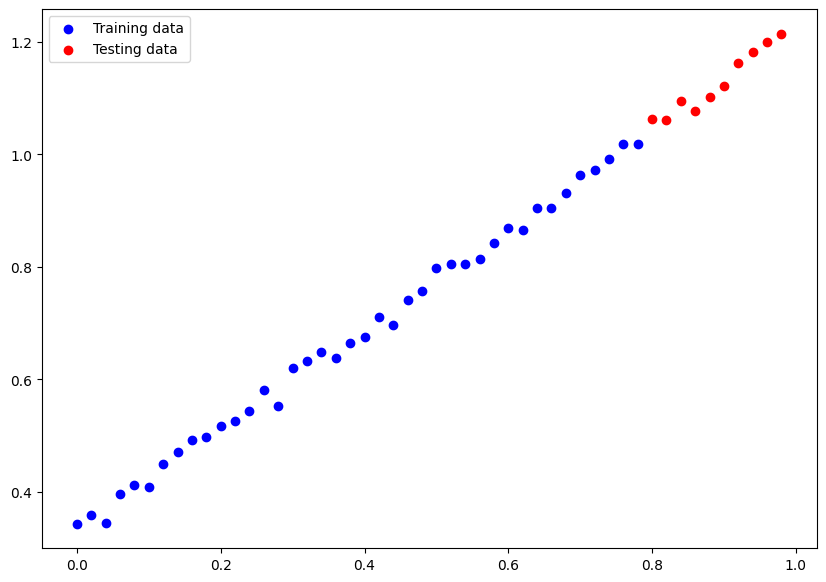

In [88]:
plot_predictions(x_train,y_train,x_test,y_test)

In [89]:
class lrg2(nn.Module):
    def __init__ (self):
        super().__init__()
        # use nn.Linear
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
model1=lrg2()
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0446]])),
             ('linear_layer.bias', tensor([-0.2417]))])

In [90]:
model1.to('cuda')

lrg2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [91]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.001)

In [92]:
epochs=5000

x_train=x_train.to('cuda')
x_test=x_test.to('cuda')
y_train=y_train.to('cuda')
y_test=y_test.to('cuda')

for epoch in range(epochs):
    model1.train()
    y_pred=model1(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model1.eval()
    with torch.inference_mode():
        test_pred=model1(x_test)
        test_loss=loss_fn(test_pred,y_test)

    if epoch%75==0:
        print(f'Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss}')
    

Epoch:0 | Loss:0.9386948943138123 | Test loss:1.4076480865478516
Epoch:75 | Loss:0.852287232875824 | Test loss:1.3066154718399048
Epoch:150 | Loss:0.7658795118331909 | Test loss:1.205582857131958
Epoch:225 | Loss:0.679472029209137 | Test loss:1.1045502424240112
Epoch:300 | Loss:0.5930644869804382 | Test loss:1.003517746925354
Epoch:375 | Loss:0.50665682554245 | Test loss:0.9024850726127625
Epoch:450 | Loss:0.42024922370910645 | Test loss:0.8014524579048157
Epoch:525 | Loss:0.33384227752685547 | Test loss:0.7004207968711853
Epoch:600 | Loss:0.2508593499660492 | Test loss:0.6013284921646118
Epoch:675 | Loss:0.19402889907360077 | Test loss:0.5175256133079529
Epoch:750 | Loss:0.15555515885353088 | Test loss:0.4473973214626312
Epoch:825 | Loss:0.136630579829216 | Test loss:0.3977468013763428
Epoch:900 | Loss:0.12385793030261993 | Test loss:0.35652637481689453
Epoch:975 | Loss:0.11382037401199341 | Test loss:0.3205011785030365
Epoch:1050 | Loss:0.10861875861883163 | Test loss:0.2964765131473

In [93]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8661]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3430], device='cuda:0'))])

In [94]:
with torch.inference_mode():
    y_preds=model1(x_test)

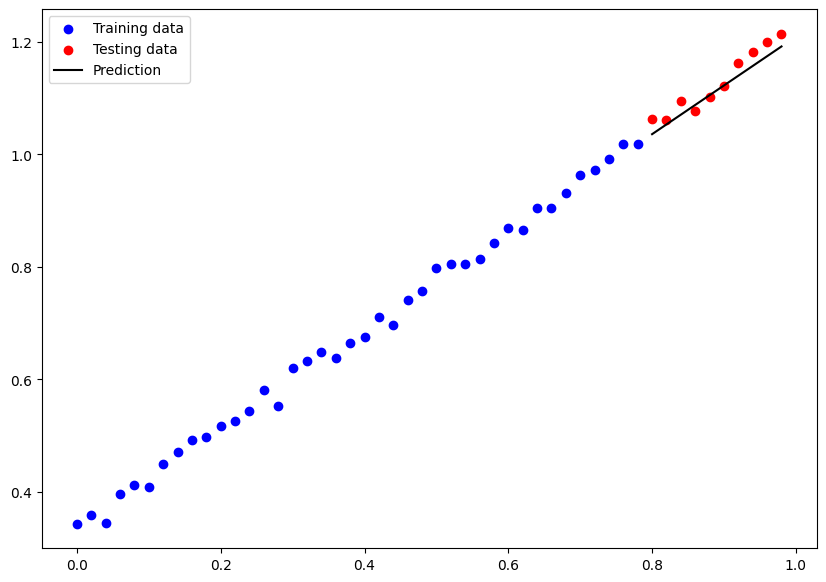

In [95]:
plot_predictions(x_train.to('cpu'),y_train.to('cpu'),x_test.to('cpu'),y_test.to('cpu'),y_preds.to('cpu'))

In [100]:
from pathlib import Path

model_path=Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name='pytorch_model1.pt'
model_save_path= model_path / model_name

torch.save(obj=model1.state_dict(),f=model_save_path)

In [105]:
loadmodel1=lrg2()
loadmodel1.load_state_dict(torch.load(model_save_path))
loadmodel1.to('cuda')

lrg2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [106]:
loadmodel1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8661]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3430], device='cuda:0'))])